In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Setting SLIM Voltages Programmatically 

We currently operate the SLIM instrument using an Excel spreadsheet that calculates voltages. To do so, it specifically maps each of the electrode voltages in a very unwieldy array that's hundreds of cells long. This was more reasonable when the instrument was only comprised of one IM region; as we have expanded instrument capabilities, the increase in the number of channels utilized makes voltage assignment much more complicated. 

Furthermore, to access new experimental methods, we need a robust way of controlling voltages in a time-dependent manner. We currently make signal tables by hand, adding voltages to individual channels at individual timepoints. Besides already being prone to human error, this method also will be very difficult as signal tables get longer and more intricate (i.e., raising voltages in a step-wise fashion over many timepoints.) Generating signal tables programmatically will already require some Python representation of our instrument, and thus meshes well with remaking the entire Excel voltage key in python.

## Long-term goals
 - Duplicate the functionality of the Excel spreadsheet, namely in providing input voltages for the MIPS software
 - Graphically represent the voltages on the instrument
 - Generate signal tables using the voltage assignments of each of the channels
 - Improve record-keeping by providing a function that prints out the voltage settings for a particular run
 
## Short-term goals (to be updated daily)
 - Define a channel class
 - Add a set_voltage method to the channel class
 - Organize channels into dictionaries depending on their MIPS input location
 - Develop a naming protocol for the *descriptions* of the channels, i.e. the physical input the channel controls


In [23]:
class channel:
    """The channel class represents the physical voltage inputs for the SLIM instrument.
    The channel class represents a MIPS input."""
    
    def __init__(self, description, voltage):
        self.description = description
        self.voltage = voltage
    
    def set_voltage(self, new_voltage):
        self.voltage = new_voltage

In [101]:
class region:
    """The region class represents the space between two voltage inputs. 
    Over a defined length, the two voltage inputs create the separation field."""
    def __init__(self, description, length, field_strength):
        self.description = description
        self.length = length
        self.field_strength = field_strength
        
    def set_length(self, new_length):
        self.length = new_length
        
    def set_field_strength(self, new_field_strength):
        self.field_strength = new_field_strength
        
    def voltage_drop(self):
        voltage_drop = self.field_strength * self.length
        return voltage_drop

In [77]:
# Define the region and channels of the CIF
CIF = region('CIF', 10.87, 0)
CSSO = channel('CCSO', 0)
CIF_CL = channel('CIFCL', 0)
CIF_dc_out = channel('CIF_dc_out', 0)
CIF_dc_in = channel('CIF_dc_in', 0)

In [78]:
# Define the field strengths and voltage drops of the CIF
CSSO.set_voltage(-110)
CIF.set_field_strength(6)
CIF_CL_to_CCSO_drop = 3
CIF_to_CIF_CL_drop = 2
CIF.set_field_strength(6)

In [79]:
CIF_CL.set_voltage(CSSO.voltage + CIF_CL_to_CCSO_drop)
CIF_dc_out.set_voltage(CIF_CL.voltage + CIF_to_CIFCL_drop)
CIF_dc_in.set_voltage(CIF_dc_out.voltage + (CIF.length * CIF.field_strength))

In [83]:
print(CIF_CL.voltage, CIF_dc_out.voltage, np.around(CIF_dc_in.voltage))

-107 -105 -40.0


## SLIM 2

In [133]:
# Define the region and channels of SLIM 2
SLIM2 = region('SLIM2', 38.1, 0)
SLIM2_dc_in = channel('SLIM2_dc_in', 0)
SLIM2_dc_out = channel('SLIM2_dc_out', 0)
SLIM2_8M_SG = channel('8M_SG', 0)

In [134]:
#Define the field strengths and voltage drops
SLIM2.set_field_strength(4)
SLIM2_to_CIF_drop = 5
SLIM2_8M_SG_bias = 4

In [135]:
#Set SLIM2 voltages
SLIM2_dc_out.set_voltage(CIF_dc_in.voltage + SLIM2_to_CIF_drop)
SLIM2_dc_in.set_voltage(SLIM2_dc_out.voltage + (SLIM2.field_strength * SLIM2.length))
SLIM2_8M_interface = (SLIM2_dc_in.voltage - (SLIM2.voltage_drop()))
SLIM2_8M_SG.set_voltage(SLIM2_8M_interface + M8_switch_guard_bias)

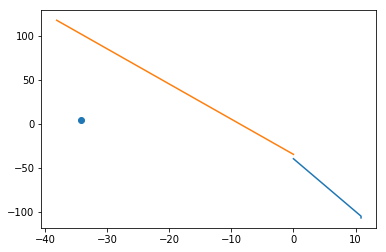

In [136]:
plt.plot([0,10.87,10.87],[CIF_dc_in.voltage,CIF_dc_out.voltage,CIF_CL.voltage])
plt.plot([-38.1,0,], [SLIM2_dc_in.voltage, SLIM2_dc_out.voltage])
plt.scatter([-34.2138],[SLIM2_8M_SG.voltage])

In [137]:
SLIM2_8M_interface

0.0